## FFT

In [1]:
from numpy.fft import fft, fftshift
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.constants import pi

plt.style.use("ggplot")

In [2]:
def get_plot_values(time_signal, fs, stop_time, fft_len=2**18, f_max=20, y_min=None):
    N = fs * stop_time
    blackman_window = signal.windows.blackman(N)
    time_signal *= blackman_window

    fft_len = 2**20
    summed_fft = fft(time_signal, fft_len) / (N / 2)
    summed_fft_log = 10 * np.log10(fftshift(summed_fft))
    freq = np.linspace(-fs / 2, fs / 2, fft_len)
    indices = np.where((freq > 0) & (freq < f_max))
    x_values = freq[indices]
    y_values = summed_fft_log[indices]

    if y_min is not None:
        y_values[y_values < y_min] = y_min
        y_values -= y_min

    return dict(x_values=x_values, y_values=y_values)

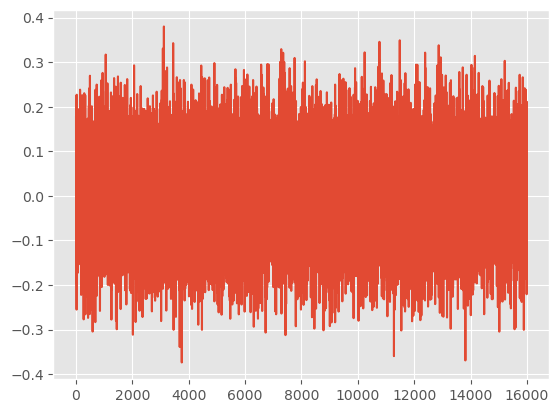

In [3]:
stop_time = 16
fs = 1000
N = fs * stop_time
t = np.linspace(0, stop_time, N)

noise_mu = 0
noise_sigma_db = -10
noise_sigma = 10 ** (noise_sigma_db / 10)

np.random.seed(0)
noise = np.random.normal(loc=noise_mu, scale=noise_sigma, size=t.size)
plt.plot(noise)

(6.0, 10.0)

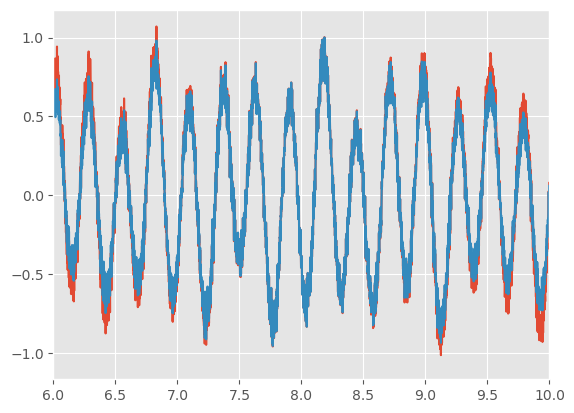

In [4]:
f_scale = 1
f1 = 1.5 * f_scale
f2 = 2.7 * f_scale
f_clutter = 3.7 * f_scale
power_norm_1 = -6
power_norm_2 = -9
power_norm_clutter = 0
A_1 = 10 ** (power_norm_1 / 10)
A_2 = 10 ** (power_norm_2 / 10)
A_clutter = 10 ** (power_norm_clutter / 10)


x_n = (
    A_1 * np.sin(2 * pi * f1 * t)
    + A_2 * np.sin(2 * pi * f2 * t)
    + A_clutter * np.sin(2 * pi * f_clutter * t)
    + noise
) / (A_1 + A_2 + A_clutter + noise_sigma)

blackman_window = signal.windows.blackman(N)
x_n_windowed = x_n * blackman_window

plt.plot(t, x_n)
plt.plot(t, x_n_windowed)
# plt.plot(t, blackman_window)
plt.xlim(6, 10)

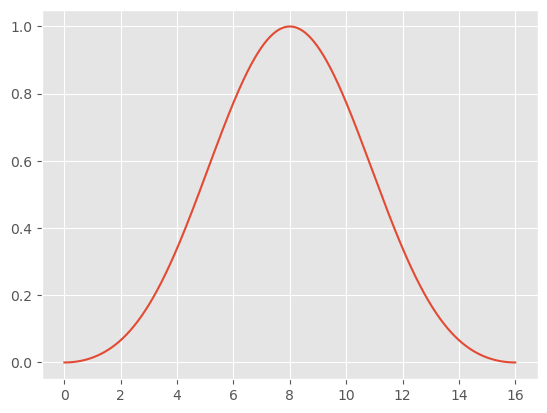

In [5]:
plt.plot(t, blackman_window)

In [6]:
N

16000

(0.0, 8.0)

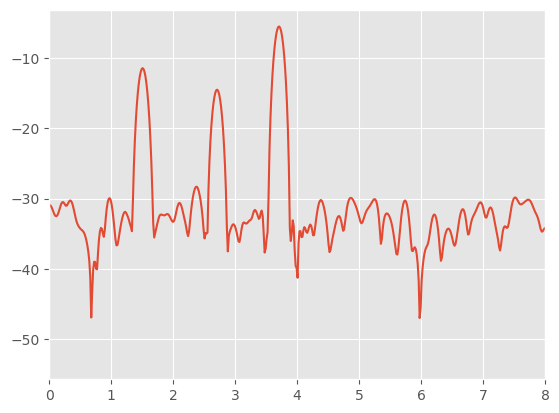

In [7]:
# fft_len = 2**14
fft_len = N * 4

# X_k = np.abs(fft(x_n_windowed, fft_len) / (N / 2))
# X_k = 10 * np.log10(fftshift(X_k))
X_k = fftshift(fft(x_n_windowed, fft_len))
X_k /= N / 2
X_k = np.abs(X_k)
X_k = 10 * np.log10(X_k)
# X_k = 10 * np.log10(fftshift(X_k))
# X_k -= X_k.max()

freq = np.linspace(-fs / 2, fs / 2, fft_len)

plt.plot(freq, X_k)
plt.xlim(0, 8 * f_scale)
# plt.ylim(-50, 5)

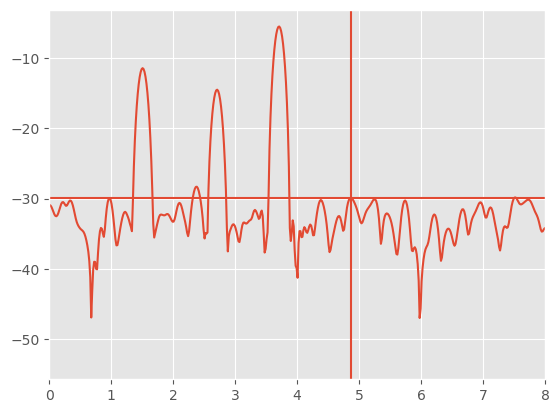

In [19]:
idx_local_max = X_k[(freq > 4) & (freq < 5)].argmax()
f_local_max = freq[(freq > 4) & (freq < 5)][idx_local_max]
mag_local_max = X_k[(freq > 4) & (freq < 5)][idx_local_max]

plt.plot(freq, X_k)
plt.xlim(0, 8 * f_scale)
plt.axvline(f_local_max)
plt.axhline(mag_local_max)

In [8]:
x_n_windowed.size

16000

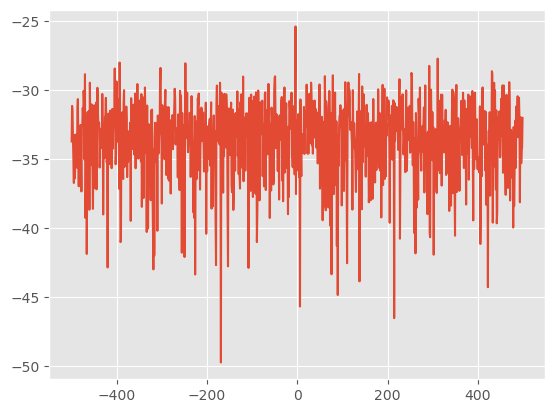

In [9]:
from scipy import interpolate

f_X_k = interpolate.interp1d(freq, X_k)

new_freq = freq[(freq > -fs / 2 * f_scale) & (freq < fs / 2 * f_scale)]

points_to_plot = 1000
new_freq = new_freq[:: new_freq.size // points_to_plot]
new_X_k = f_X_k(new_freq)

plt.plot(new_freq, new_X_k)

In [10]:
new_freq.size

1016

In [11]:
def get_fft_values(x_n, fs, stop_time, fft_len=2**18, f_max=20):
    N = stop_time * fs

    X_k = np.abs(fft(x_n, fft_len) / (N / 2))
    X_k = 10 * np.log10(fftshift(X_k))
    # X_k -= X_k.max()

    freq = np.linspace(-fs / 2, fs / 2, fft_len)

    indices = np.where((freq > 0) & (freq < f_max))
    x_values = freq[indices]
    y_values = X_k[indices]

    return x_values, y_values

In [12]:
x_values, y_values = get_fft_values(
    x_n_windowed, fs=fs, stop_time=stop_time, fft_len=fft_len, f_max=8
)

(-50.0, 5.0)

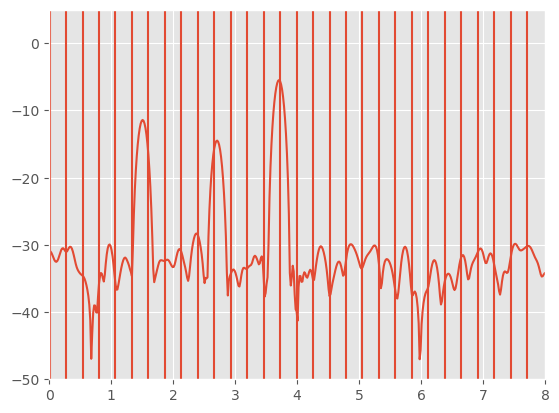

In [13]:
n_samples = 30


plt.plot(x_values, y_values)
for x in x_values[:: x_values.size // 30][:n_samples]:
    plt.axvline(x)
plt.xlim(0, 8)
plt.ylim(-50, 5)

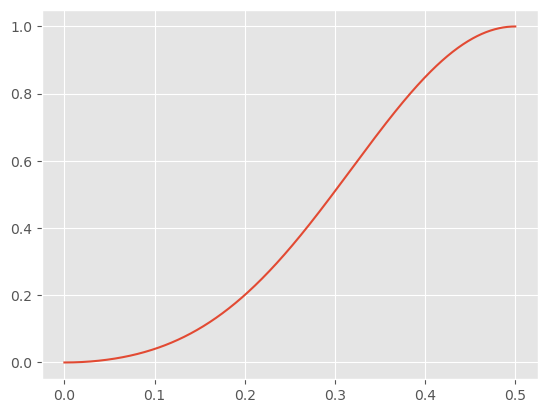

In [14]:
from scipy.interpolate import interp1d

t_vis = np.linspace(0, 1, fs)
computed_window = signal.windows.blackman(t_vis.size)
f_window = interp1d(t_vis, computed_window)

xnew = np.linspace(0, 0.5, 923)
ynew = f_window(xnew)
plt.plot(xnew, ynew)

In [15]:
f_window(0.4)

array(0.84922747)